In [1]:
"""
Create Detector
"""

import yolov4_tiny_detector.detectors as dct

jn_path = 'model_weights/JND-v4.0-E200-TL1.3365-VL1.5460.pth'
digit_path = 'model_weights/JND-v3.1-E26-TL1.0692-VL1.0021.pth'
device = 'cpu'  # CPU: 'cpu', GPU: 'cuda'

detector = dct.JerseyNumberCatcher(jn_path, digit_path, device=device)

Initializing model...
Set device to "cpu" successfully!
Loading weights into state dict...
Initializing YOLO bounding-box decoder...
Jersey Number Detector Loaded!
Initializing model...
Set device to "cpu" successfully!
Loading weights into state dict...
Initializing YOLO bounding-box decoder...
Digit Detector Loaded!


In [2]:
"""
Detect Jersey Number
"""
from PIL import Image
import time

img = Image.open('sample.jpg')

t0 = time.time()
# detector and return bboxes
bboxes = detector.detect_image(img, leader='left')
# you can also get bbox by
bboxes = detector.result

# bbox format: ()
print(bboxes)
print(f'{device} Execution Time: {time.time()-t0:.4f} s')

[[13, '13', 0.99133223, [162.80061, 242.71727, 189.44998, 268.49567]], [10, '10', 0.991185, [229.1493, 210.88663, 256.24963, 240.55249]], [29, '29', 0.942643, [312.44818, 210.4622, 332.81555, 236.4552]], [8, '8', 0.86776096, [183.94203, 97.56891, 207.9379, 118.58397]], [22, '22', 0.85309184, [134.50436, 211.46162, 158.1548, 233.01889]]]
cpu Execution Time: 1.5975 s


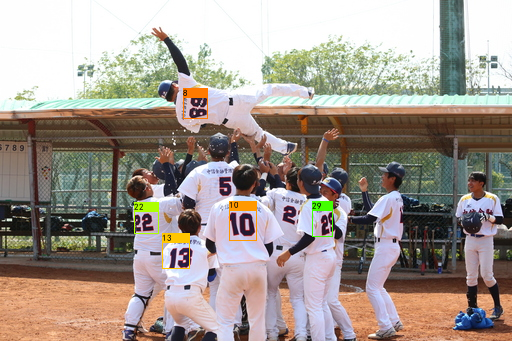

In [3]:
"""
Show Bounding Box
"""
# use utils draw bbox
from yolov4_tiny_detector.utils import painter

# set 100 colors according 100 classes
colors = painter.set_colors(100)

painter.mark_bboxes(
    img, 
    detector.result, 
    colors, show_text=True, 
    show_cfd=False, 
    line_thick=1, 
    text_size=0.6
)